![ieseg logo](./img/ieseg.png)

#### MBD 2019-2020 - Stephanie Beyer Diaz
# Statistical & Machine Learning Approaches for Marketing

## Assignment 4

**1. Import all required libraries and datasets**

In [1]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)

library(e1071)

Warning message:
"package 'mlr' was built under R version 3.6.2"Loading required package: ParamHelpers
Warning message:
"package 'ParamHelpers' was built under R version 3.6.2"'mlr' is in maintenance mode since July 2019. Future development
efforts will go into its successor 'mlr3' (<https://mlr3.mlr-org.com>).
Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2

Attaching package: 'caret'

The following object is masked from 'package:mlr':

    train

Warning message:
"package 'ISLR' was built under R version 3.6.2"Warning message:
"package 'MASS' was built under R version 3.6.2"Warning message:
"package 'e1071' was built under R version 3.6.2"
Attaching package: 'e1071'

The following object is masked from 'package:mlr':

    impute



**Exercise 1 (p. 368, Chap. 9)**<br><br>
*1. This problem involves hyperplanes in two dimensions.*<br><br>
*(a) Sketch the hyperplane 1 + 3X1 − X2 = 0. Indicate the set of
points for which 1 + 3X1 − X2 > 0, as well as the set of points
for which 1 + 3X1 − X2 < 0.*

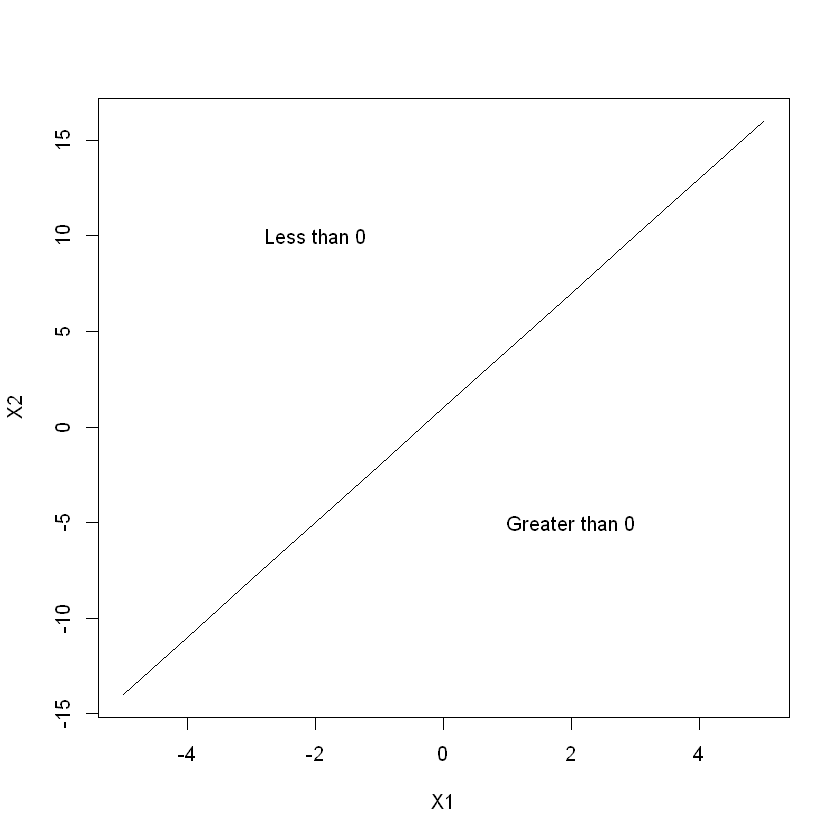

In [2]:
X1 <- seq(-5,5,1) 

#1 + 3X1 - X2 = 0 -> X2 = 1 + 3X2
X2 <- 1 + 3*X1

plot(X1, X2, xlab='X1', ylab='X2', type='l')

#X1 = 2, X2 = -5 -> 1 + 6 + 5 = 12 > 0
text(c(2), c(-5), "Greater than 0")

#X1 = -2, X2 = 10 -> 1 - 6 - 10 = -15 < 0
text(c(-2), c(10), "Less than 0")

*(b) On the same plot, sketch the hyperplane −2 + X1 + 2X2 = 0.
Indicate the set of points for which −2+ X1 +2X2 > 0, as well
as the set of points for which −2+ X1 + 2X2 < 0.*

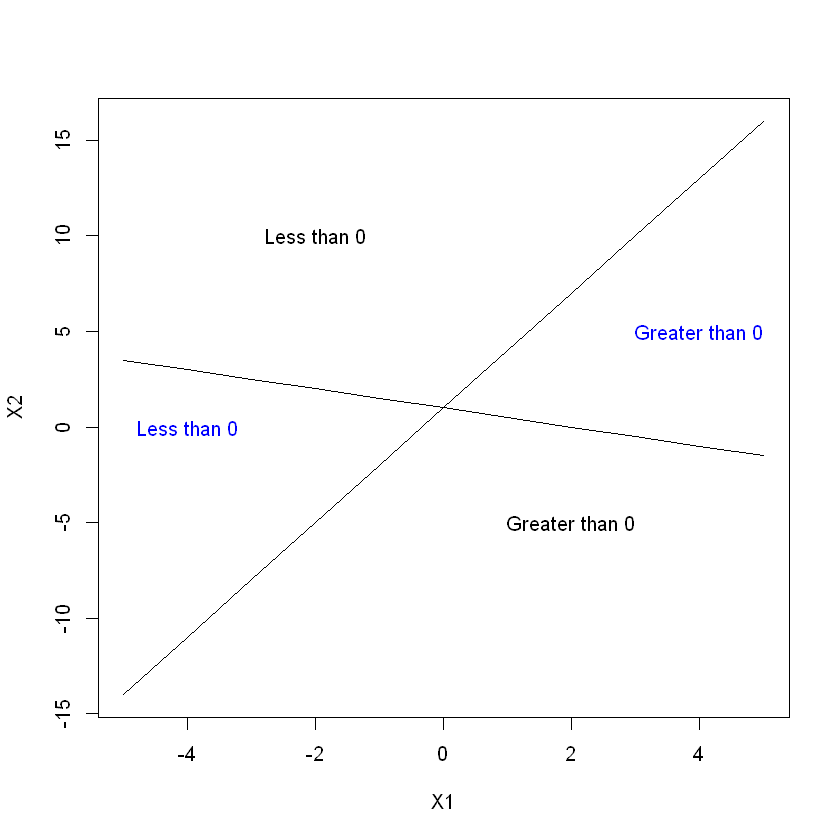

In [3]:
X1 <- seq(-5,5,1) 
X2 <- 1 + 3*X1

plot(X1, X2, xlab='X1', ylab='X2', type='l')

#-2 + X1 + 2X2 = 0 -> X2 = (2 - X1)/2
X2 <- (2 - X1)/2

lines(X1, X2)

#a
text(c(2), c(-5), "Greater than 0")
text(c(-2), c(10), "Less than 0")

#b
#X1 = -4, X2 = 0 -> -2 - 4 + 0 = -6 < 0
text(c(-4), c(0), "Less than 0", col='blue')

#X1 = 4, X2 = 5 -> -2 + 4 + 10 = 12 > 0
text(c(4), c(5), "Greater than 0", col='blue')

**Exercise 2 (p. 368, Chap. 9)**<br><br>
*2. We have seen that in p = 2 dimensions, a linear decision boundary
takes the form β0+β1X1+β2X2 = 0.We now investigate a non-linear
decision boundary.*<br><br>
*(a) Sketch the curve
(1 + X1)² + (2 − X2)² = 4.*

Warning message in sqrt(4 - (1 + X1)^2):
"NaNs produced"Warning message in sqrt(4 - (1 + X1)^2):
"NaNs produced"

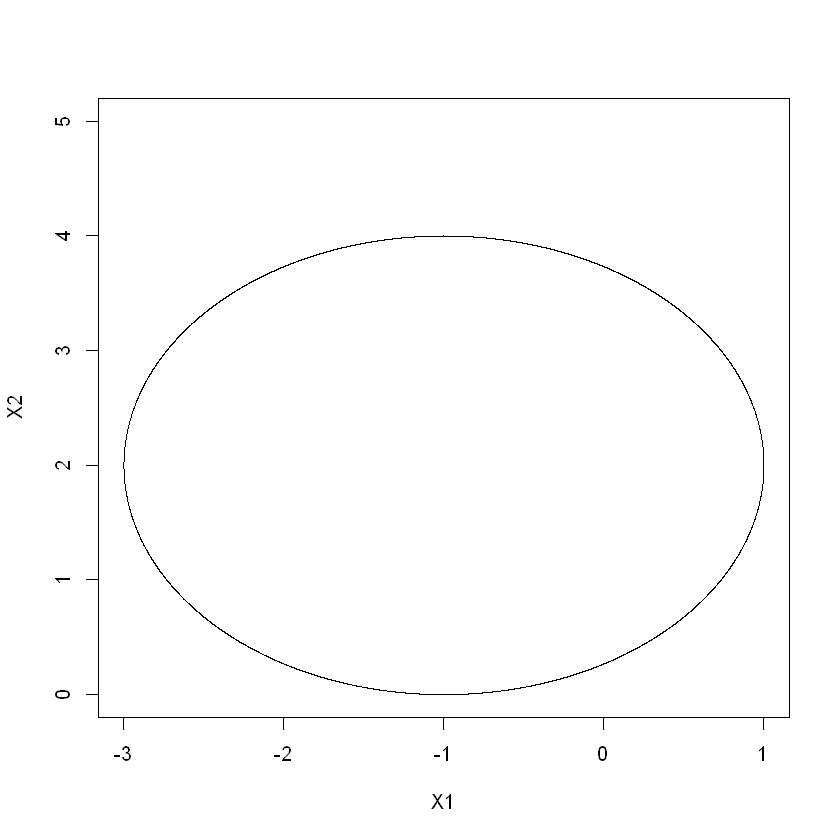

In [4]:
X1 <- seq(-3,3,0.001)

X2 <- 2 - sqrt(4 - (1 + X1)^2)

plot(X1, X2, type='l', xlim = c(-3, 1), ylim = c(0, 5))

X2 <- 2 + sqrt(4 - (1 + X1)^2) #sqrt can have positive or negative result

lines(X1, X2)

*(b) On your sketch, indicate the set of points for which
(1 + X1)² + (2 − X2)² > 4,
as well as the set of points for which
(1 + X1)² + (2 − X2)² ≤ 4.*

Warning message in sqrt(4 - (1 + X1)^2):
"NaNs produced"Warning message in sqrt(4 - (1 + X1)^2):
"NaNs produced"

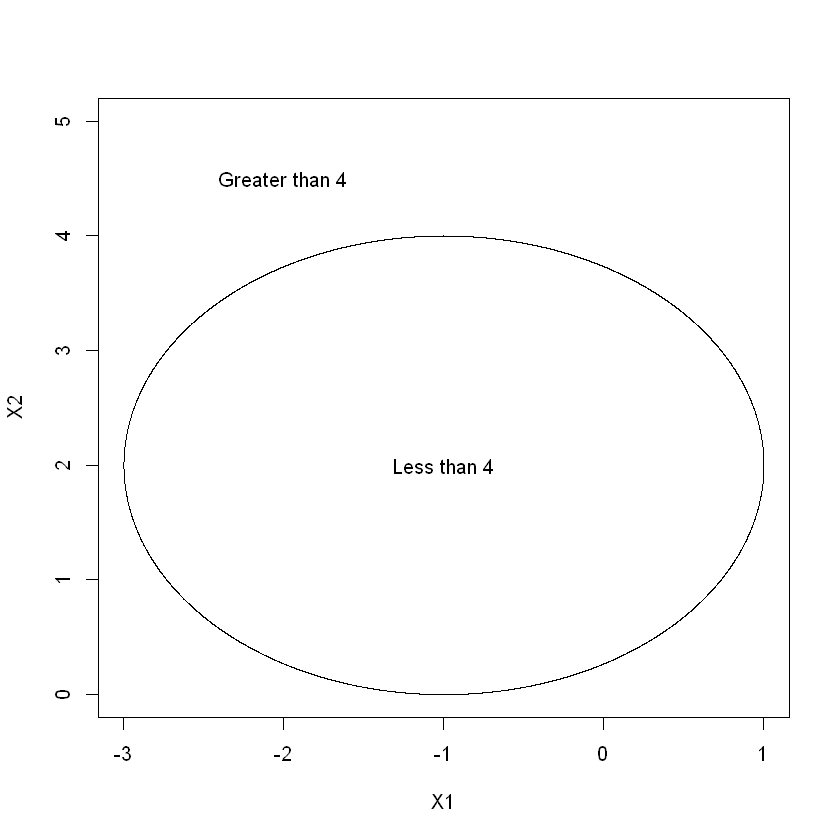

In [5]:
X1 <- seq(-3,3,0.001)

X2 <- 2 - sqrt(4 - (1 + X1)^2)

plot(X1, X2, type='l', xlim = c(-3, 1), ylim = c(0, 5))

X2 <- 2 + sqrt(4 - (1 + X1)^2)

lines(X1, X2)

#X1 = -2, X2 = 4.5 -> 1 + 6.25 = 7.25 > 4
text(c(-2), c(4.5), "Greater than 4")

#X1 = -1, X2 = 2 -> 0 + 0 = 0 ≤ 4
text(c(-1), c(2), "Less than 4")

*(c) Suppose that a classifier assigns an observation to the blue class
if
(1 + X1)² + (2 − X2)² > 4,
and to the red class otherwise. To what class is the observation
(0, 0) classified? (−1, 1)? (2, 2)? (3, 8)?*

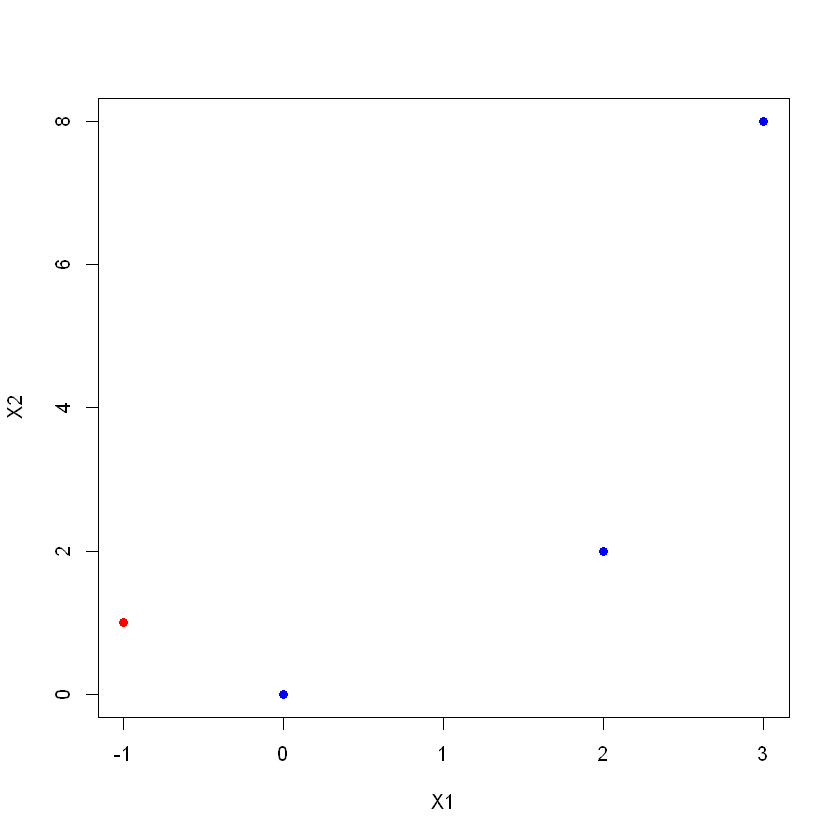

In [6]:
X1 <- c(0, -1, 2, 3)
X2 <- c(0, 1, 2, 8)

# (1 + 0)^2 + (2 - 0)^2 = 5 > 4 (blue)
# (1 - 1)^2 + (2 - 1)^2 = 1 < 4 (red)
# (1 + 2)^2 + (2 - 2)^2 = 9 > 4 (blue)
# (1 + 3)^2 + (2 - 8)^2 = 52 > 4 (blue)

plot(X1, X2, col = c("blue", "red", "blue", "blue"), pch=16, xlab = "X1", ylab = "X2")

*(d) Argue that while the decision boundary in (c) is not linear in
terms of X1 and X2, it is linear in terms of X1, X1², X2, and X2².*

(1 + X1)² + (2 − X2)² = 4<br><br>
1 + 2X1 + X1² - 4X2 + X2² = 0<br><br>
X1² + X2² + 2X1 - 4X2 + 1 = 0

**Exercise 4 (p. 369, Chap. 9)**<br>
*4. Generate a simulated two-class data set with 100 observations and
two features in which there is a visible but non-linear separation between
the two classes. Show that in this setting, a support vector
machine with a polynomial kernel (with degree greater than 1) or a
radial kernel will outperform a support vector classifier on the training
data. Which technique performs best on the test data? Make
plots and report training and test error rates in order to back up
your assertions.*

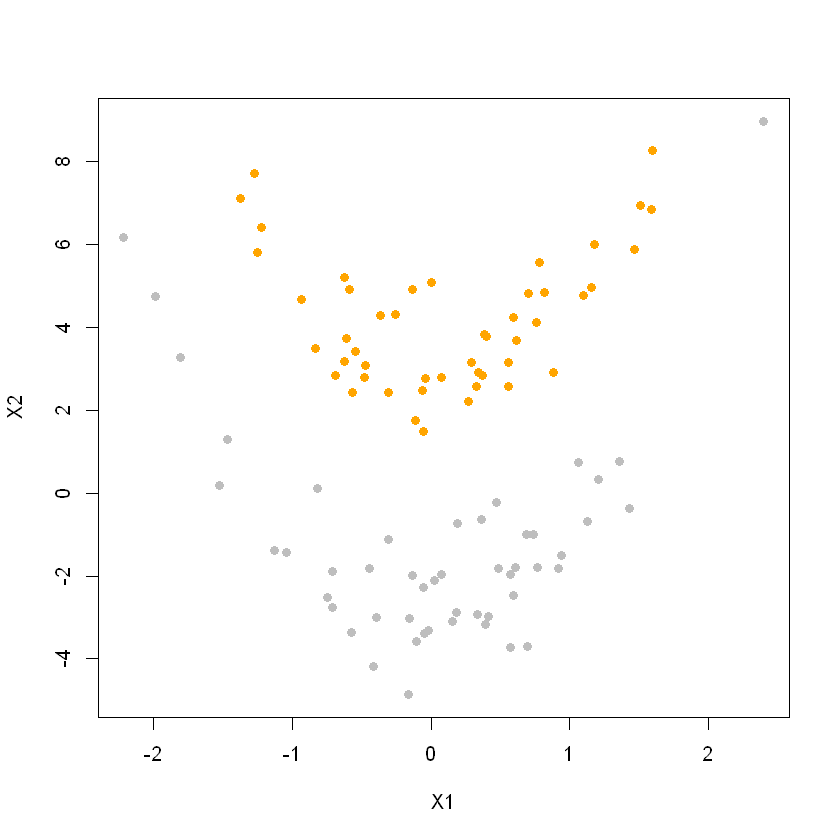

In [7]:
# generate dataset
set.seed(1)
X1 = rnorm(100) #random
X2 = 2 * X1^2 + rnorm(100) #random + nonlinear shape

class <- sample(100, 50) #separating classes
X2[class] <- X2[class] + 3
X2[-class] <- X2[-class] - 3

X = data.frame(X1, X2)

plot(X1[-class],X2[-class], xlab='X1', ylab='X2', col='grey', pch=16)
points(X1[class],X2[class], xlab='X1', ylab='X2', col='orange', pch=16)

       truth
predict -1  1
     -1 25  0
     1   0 25

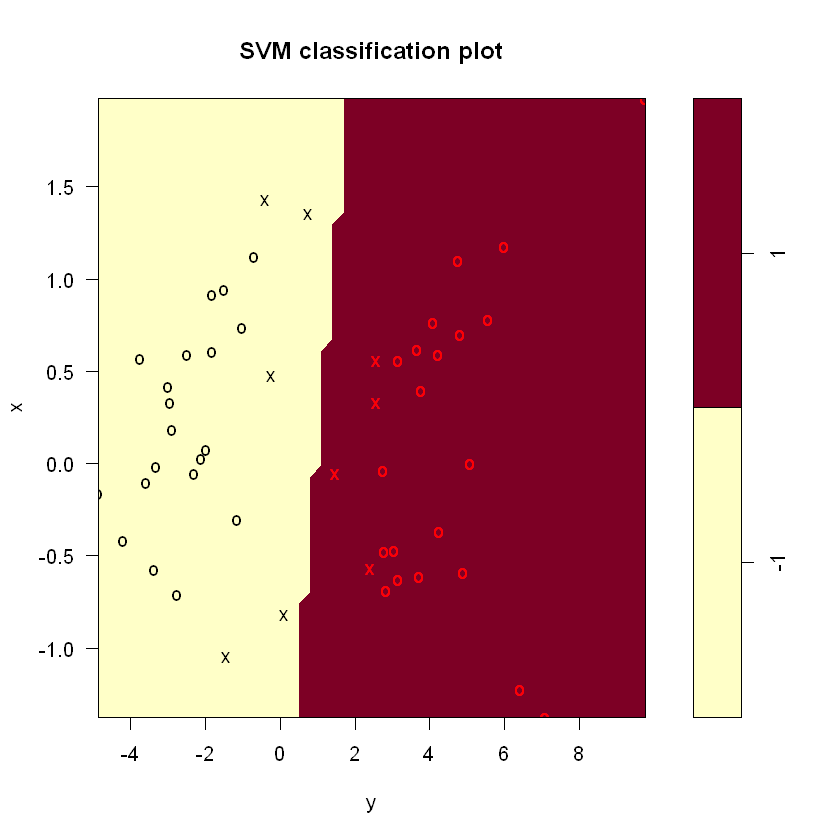

In [8]:
z <- rep(-1, 100)
z[class] <- 1
data <- data.frame(x = X1, y = X2, z = as.factor(z))
train <- sample(100, 50)
data.train <- data[train, ]
data.test <- data[-train, ]
svm.linear <- svm(z ~ ., data = data.train, kernel = "linear")
plot(svm.linear, data.train)
table(predict = predict(svm.linear, data.train), truth = data.train$z)
#1 error

       truth
predict -1  1
     -1 25  0
     1   1 24

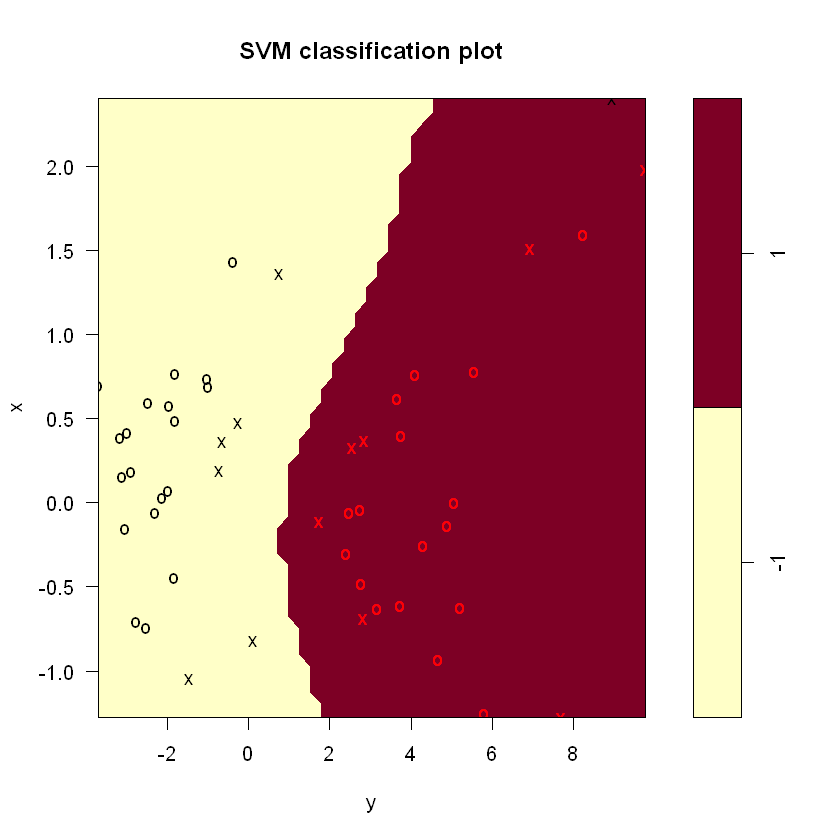

In [9]:
z <- rep(-1, 100)
z[class] <- 1
data <- data.frame(x = X1, y = X2, z = as.factor(z))
train <- sample(100, 50)
data.train <- data[train, ]
data.test <- data[-train, ]
svm.radial <- svm(z ~ ., data = data.train, kernel = "radial")
plot(svm.radial, data.train)
table(predict = predict(svm.radial, data.train), truth = data.train$z)
#0 errors

       truth
predict -1  1
     -1 25  0
     1   2 23

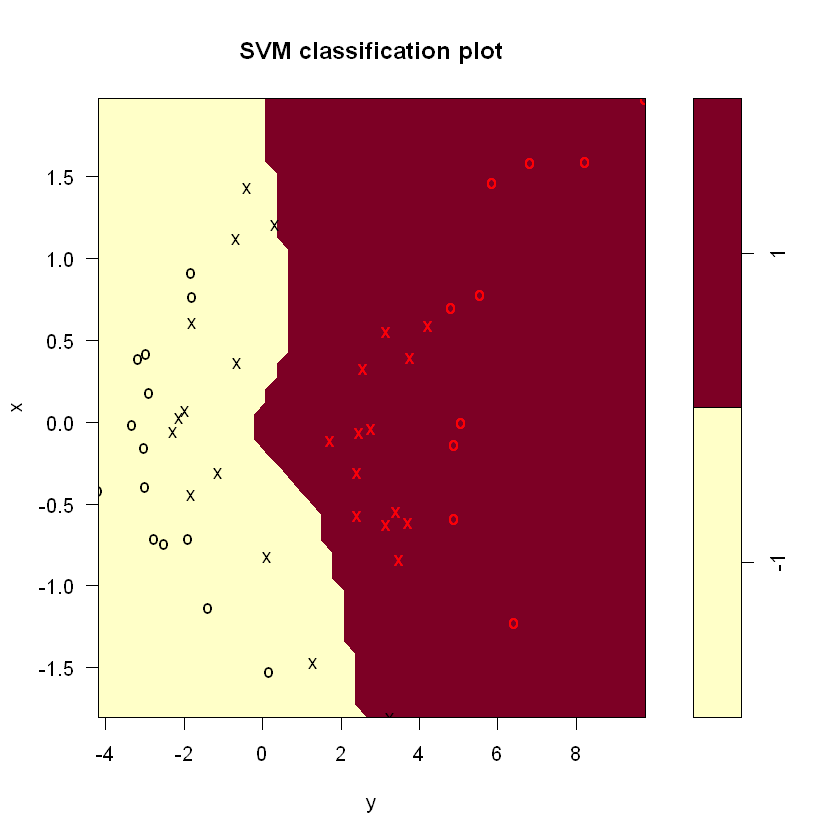

In [10]:
z <- rep(-1, 100)
z[class] <- 1
data <- data.frame(x = X1, y = X2, z = as.factor(z))
train <- sample(100, 50)
data.train <- data[train, ]
data.test <- data[-train, ]
svm.poly <- svm(z ~ ., data = data.train, kernel = "polynomial")
plot(svm.poly, data.train)
table(predict = predict(svm.poly, data.train), truth = data.train$z)
#12 errors

**Exercise 7 (p. 371, Chap. 9)**<br>
*In this problem, you will use support vector approaches in order to
predict whether a given car gets high or low gas mileage based on the
Auto data set.*<br>
*(a) Create a binary variable that takes on a 1 for cars with gas
mileage above the median, and a 0 for cars with gas mileage
below the median.*

In [11]:
Auto$g_mile=ifelse(Auto$mpg>median(Auto$mpg),1,0)
table(Auto$g_mile)


  0   1 
196 196 

*(b) Fit a support vector classifier to the data with various values
of cost, in order to predict whether a car gets high or low gas
mileage. Report the cross-validation errors associated with different
values of this parameter. Comment on your results.*

In [12]:
set.seed(1)

costs= c(seq(0.05,100,length.out = 15))               # tuning grid for the cost parameter.

tune.out <- tune(svm, g_mile ~ ., data = Auto, kernel = "linear", ranges = list(cost = costs))
summary(tune.out)

#best performance: cost = 0.05


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
 0.05

- best performance: 0.08099079 

- Detailed performance results:
         cost      error dispersion
1    0.050000 0.08099079 0.02611204
2    7.189286 0.08585708 0.03265103
3   14.328571 0.09303435 0.03385071
4   21.467857 0.09709675 0.03448474
5   28.607143 0.09899291 0.03485814
6   35.746429 0.10200715 0.03569564
7   42.885714 0.10452799 0.03546930
8   50.025000 0.10683959 0.03526781
9   57.164286 0.10890152 0.03473375
10  64.303571 0.11018258 0.03566600
11  71.442857 0.11114533 0.03598201
12  78.582143 0.11165518 0.03573290
13  85.721429 0.11231081 0.03597818
14  92.860714 0.11325317 0.03721457
15 100.000000 0.11389623 0.03717388


*(c) Now repeat (b), this time using SVMs with radial and polynomial
basis kernels, with different values of gamma and degree and
cost. Comment on your results.*

In [13]:
set.seed(1)
gamma <- c(0.01, 0.1, 1, 5, 10)
tune.out <- tune(svm, g_mile ~ ., data = Auto, kernel = "radial", ranges = list(cost = costs, gamma = gamma))
summary(tune.out)

#best parameters: cost 7.19, gamma 0.01


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost gamma
 7.189286   0.1

- best performance: 0.0383733 

- Detailed performance results:
         cost gamma      error  dispersion
1    0.050000  0.01 0.09006423 0.020195298
2    7.189286  0.01 0.06438099 0.023941799
3   14.328571  0.01 0.05873536 0.021615080
4   21.467857  0.01 0.05516813 0.021144226
5   28.607143  0.01 0.05288155 0.020337346
6   35.746429  0.01 0.05159951 0.020069389
7   42.885714  0.01 0.05094385 0.020497132
8   50.025000  0.01 0.05051465 0.020519586
9   57.164286  0.01 0.05046176 0.020514133
10  64.303571  0.01 0.05064382 0.020588200
11  71.442857  0.01 0.05081621 0.020646071
12  78.582143  0.01 0.05099583 0.020696459
13  85.721429  0.01 0.05117446 0.020777628
14  92.860714  0.01 0.05133566 0.020866219
15 100.000000  0.01 0.05152417 0.020957231
16   0.050000  0.10 0.06106796 0.018668189
17   7.189286  0.10 0.03837330 0.022263356
18  14.328571  0.10 0.03838658 0.02

In [14]:
set.seed(1)
tune.out <- tune(svm, g_mile ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = costs, degree = c(2, 3, 4)))
summary(tune.out)

#best parameters: cost 100, degree 3


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  100      3

- best performance: 0.20262 

- Detailed performance results:
         cost degree     error dispersion
1    0.050000      2 0.4972732 0.03956272
2    7.189286      2 0.3635934 0.08372738
3   14.328571      2 0.3225479 0.07314684
4   21.467857      2 0.3120288 0.06385397
5   28.607143      2 0.3032809 0.06845983
6   35.746429      2 0.2924539 0.07301600
7   42.885714      2 0.2828107 0.07481043
8   50.025000      2 0.2763664 0.07472952
9   57.164286      2 0.2706068 0.07440697
10  64.303571      2 0.2641782 0.07493517
11  71.442857      2 0.2583334 0.07485909
12  78.582143      2 0.2524334 0.07435693
13  85.721429      2 0.2474843 0.07422779
14  92.860714      2 0.2432192 0.07420966
15 100.000000      2 0.2394265 0.07386460
16   0.050000      3 0.4980014 0.03935203
17   7.189286      3 0.4339349 0.04781976
18  14.328571      3 0.3781750 0.05611027
19  21.467857      

*(d) Make some plots to back up your assertions in b and c.*

In [15]:
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,g_mile
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
15,8,350,165,3693,11.5,70,1,buick skylark 320,0
18,8,318,150,3436,11.0,70,1,plymouth satellite,0
16,8,304,150,3433,12.0,70,1,amc rebel sst,0
17,8,302,140,3449,10.5,70,1,ford torino,0
15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


In [16]:
svm.linear <- svm(g_mile ~ ., data = Auto, kernel = "linear", cost = 0.05)
svm.poly <- svm(g_mile ~ ., data = Auto, kernel = "polynomial", cost = 100, degree = 3)
svm.radial <- svm(g_mile ~ ., data = Auto, kernel = "radial", cost = 7, gamma = 0.01)

names = c("cylinders","displacement","horsepower","weight","acceleration","year","origin","g_mile")
for (name in names){
    plot(svm.radial, Auto, as.formula(paste("mpg~", name, sep = "")))
}
    

**8. This problem involves the OJ data set which is part of the ISLR
package.**<br><br>
*(a) Create a training set containing a random sample of 800
observations, and a test set containing the remaining
observations.*

In [17]:
set.seed(1)
train <- sample(nrow(OJ), 800)
OJ.train <- OJ[train, ]
OJ.test <- OJ[-train, ]

*(b) Fit a support vector classifier to the training data using
cost=0.01, with Purchase as the response and the other variables
as predictors. Use the summary() function to produce summary
statistics, and describe the results obtained.*

In [18]:
svm.fit <- svm(Purchase ~ . , data=OJ.train, cost=0.01, kernel='linear')
summary(svm.fit)


Call:
svm(formula = Purchase ~ ., data = OJ.train, cost = 0.01, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  435

 ( 219 216 )


Number of Classes:  2 

Levels: 
 CH MM




*(c) What are the training and test error rates?*

In [21]:
# train
svm.pred <- predict(svm.fit, OJ.train)
table(OJ.train$Purchase, svm.pred)

paste("train error rate:",(72 + 65) / (420 + 240 + 75 + 65))

    svm.pred
      CH  MM
  CH 420  65
  MM  75 240

[1] "train error rate: 0.17125"

In [24]:
#test
svm.pred <- predict(svm.fit, OJ.test)
table(OJ.test$Purchase, svm.pred)

paste("test error rate:",(33 + 15) / (153 + 69 + 33 + 15))

    svm.pred
      CH  MM
  CH 153  15
  MM  33  69

[1] "test error rate: 0.177777777777778"

*(d) Use the tune() function to select an optimal cost. Consider values
in the range 0.01 to 10.*

In [34]:
set.seed(2)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 1, by = 0.5)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 3.162278

- best performance: 0.1675 

- Detailed performance results:
         cost   error dispersion
1  0.01000000 0.17625 0.04059026
2  0.03162278 0.17125 0.04604120
3  0.10000000 0.17125 0.04168749
4  0.31622777 0.17125 0.04411554
5  1.00000000 0.17000 0.04090979
6  3.16227766 0.16750 0.03782269
7 10.00000000 0.17000 0.03736085


*(e) Compute the training and test error rates using this new value
for cost.*

In [37]:
svm.linear <- svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameter$cost)
train.pred <- predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

paste("train error rate:",(70 + 62) / (423 + 245 + 70 + 62))

test.pred <- predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

paste("test error rate:",(29 + 12) / (156 + 73 + 29 + 12))

    train.pred
      CH  MM
  CH 423  62
  MM  70 245

[1] "train error rate: 0.165"

    test.pred
      CH  MM
  CH 156  12
  MM  29  73

[1] "test error rate: 0.151851851851852"

*(f) Repeat parts (b) through (e) using a support vector machine
with a radial kernel. Use the default value for gamma.*

In [41]:
svm.radial <- svm(Purchase ~ ., kernel = "radial", data = OJ.train)
summary(svm.radial)

train.pred <- predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

paste("train error rate:",(77 + 44) / (441 + 238 + 77 + 44))

test.pred <- predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

paste("test error rate:",(33 + 17) / (151 + 69 + 33 + 17))


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  373

 ( 188 185 )


Number of Classes:  2 

Levels: 
 CH MM




    train.pred
      CH  MM
  CH 441  44
  MM  77 238

[1] "train error rate: 0.15125"

    test.pred
      CH  MM
  CH 151  17
  MM  33  69

[1] "test error rate: 0.185185185185185"

In [42]:
set.seed(2)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "radial", ranges = list(cost = 10^seq(-2, 1, by = 0.5)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.1725 

- Detailed performance results:
         cost   error dispersion
1  0.01000000 0.39375 0.03240906
2  0.03162278 0.34750 0.05552777
3  0.10000000 0.19500 0.03782269
4  0.31622777 0.17250 0.03809710
5  1.00000000 0.17250 0.03162278
6  3.16227766 0.18375 0.03438447
7 10.00000000 0.18750 0.03173239


In [44]:
svm.radial <- svm(Purchase ~ ., kernel = "radial", data = OJ.train, cost = tune.out$best.parameter$cost)
summary(svm.radial)

train.pred <- predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

paste("train error rate:",(77 + 44) / (441 + 238 + 77 + 44))

test.pred <- predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

paste("test error rate:",(33 + 17) / (151 + 69 + 33 + 17))


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial", cost = tune.out$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  373

 ( 188 185 )


Number of Classes:  2 

Levels: 
 CH MM




    train.pred
      CH  MM
  CH 441  44
  MM  77 238

[1] "train error rate: 0.15125"

    test.pred
      CH  MM
  CH 151  17
  MM  33  69

[1] "test error rate: 0.185185185185185"

*(g) Repeat parts (b) through (e) using a support vector machine
with a polynomial kernel. Set degree=2.*

In [46]:
svm.poly <- svm(Purchase ~ ., kernel = "polynomial", data = OJ.train, degree = 2)
summary(svm.poly)

train.pred <- predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

paste("train error rate:",(110 + 36) / (449 + 205 + 110 + 36))

test.pred <- predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

paste("test error rate:",(45 + 15) / (153 + 57 + 45 + 15))


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "polynomial", 
    degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  447

 ( 225 222 )


Number of Classes:  2 

Levels: 
 CH MM




    train.pred
      CH  MM
  CH 449  36
  MM 110 205

[1] "train error rate: 0.1825"

    test.pred
      CH  MM
  CH 153  15
  MM  45  57

[1] "test error rate: 0.222222222222222"

In [47]:
set.seed(2)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "polynomial", degree = 2, 
                 ranges = list(cost = 10^seq(-2, 1, by = 0.5)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 3.162278

- best performance: 0.18 

- Detailed performance results:
         cost   error dispersion
1  0.01000000 0.39000 0.03670453
2  0.03162278 0.36375 0.03197764
3  0.10000000 0.32125 0.03866254
4  0.31622777 0.20250 0.04073969
5  1.00000000 0.19625 0.03910900
6  3.16227766 0.18000 0.04005205
7 10.00000000 0.18125 0.03830162


In [50]:
svm.poly <- svm(Purchase ~ ., kernel = "polynomial", degree = 2, data = OJ.train, cost = tune.out$best.parameter$cost)
summary(svm.poly)

train.pred <- predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

paste("train error rate:",(90 + 34) / (451 + 225 + 90 + 34))

test.pred <- predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

paste("test error rate:",(41 + 14) / (154 + 61 + 41 + 14))


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "polynomial", 
    degree = 2, cost = tune.out$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  3.162278 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  385

 ( 197 188 )


Number of Classes:  2 

Levels: 
 CH MM




    train.pred
      CH  MM
  CH 451  34
  MM  90 225

[1] "train error rate: 0.155"

    test.pred
      CH  MM
  CH 154  14
  MM  41  61

[1] "test error rate: 0.203703703703704"

*(h) Overall, which approach seems to give the best results on this
data?*

In [51]:
#Radial kernel, judging on error rates on both train and test data.